In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Groceries_dataset.csv')

In [4]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [6]:
df.isnull().sum().sort_values(ascending = False)

,0
Member_number,0
Date,0
itemDescription,0


In [7]:
# Assuming the date column is named something else, like 'Date', change the code to:
df['date'] = pd.to_datetime(df['Date']) # Replace 'Date' with the actual column name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  object        
 2   itemDescription  38765 non-null  object        
 3   date             38765 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


<ipython-input-7-3ecbcf6edf3c>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['Date']) # Replace 'Date' with the actual column name


In [8]:
df.head()

,Member_number,Date,itemDescription,date
0,1808,21-07-2015,tropical fruit,2015-07-21
1,2552,05-01-2015,whole milk,2015-01-05
2,2300,19-09-2015,pip fruit,2015-09-19
3,1187,12-12-2015,other vegetables,2015-12-12
4,3037,01-02-2015,whole milk,2015-02-01


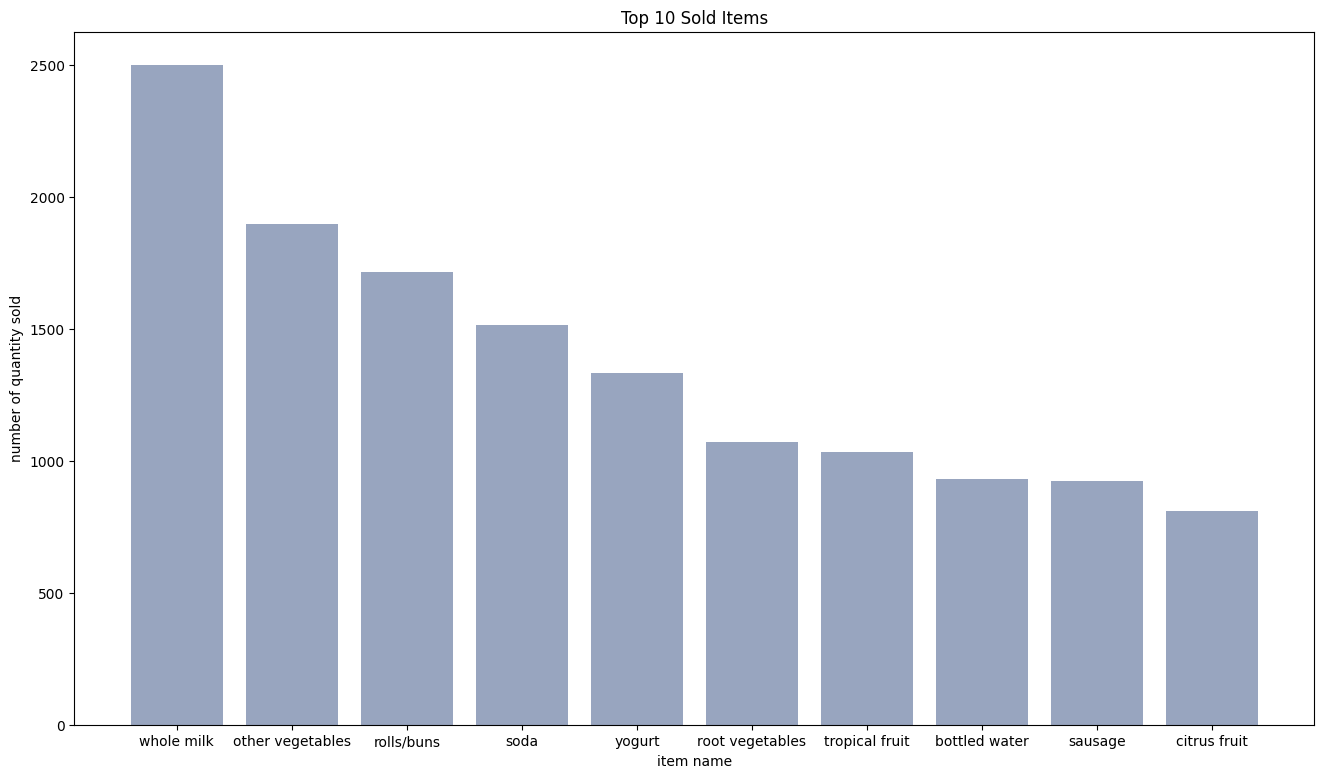

In [9]:
Item_distrn = df.groupby(by = 'itemDescription').size().reset_index(name = 'Frequency').sort_values(by = 'Frequency', ascending = False).head(10)

bars = Item_distrn["itemDescription"]
hight =Item_distrn["Frequency"]
x_pos = np.arange(len(bars))

plt.figure(figsize=(16,9))

plt.bar(x_pos, hight, color = (0.2,0.3,0.5,0.5))

plt.title("Top 10 Sold Items")
plt.xlabel("item name")
plt.ylabel("number of quantity sold")

plt.xticks(x_pos, bars)
plt.show()

In [10]:
df_date = df.set_index(['Date'])
df_date

,Member_number,itemDescription,date
Date,,,
21-07-2015,1808,tropical fruit,2015-07-21
05-01-2015,2552,whole milk,2015-01-05
19-09-2015,2300,pip fruit,2015-09-19
12-12-2015,1187,other vegetables,2015-12-12
01-02-2015,3037,whole milk,2015-02-01
...,...,...,...
08-10-2014,4471,sliced cheese,2014-10-08
23-02-2014,2022,candy,2014-02-23
16-04-2014,1097,cake bar,2014-04-16


<ipython-input-13-8ef260361681>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_date = df.set_index(pd.to_datetime(df['Date']))
<ipython-input-13-8ef260361681>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_date.resample("M")["itemDescription"].count().plot(figsize = (20,8), grid = True, title = "number _of_items_sold _per_month").set(xlabel ="date",ylabel = "Number of item sold")


[Text(0.5, 0, 'date'), Text(0, 0.5, 'Number of item sold')]

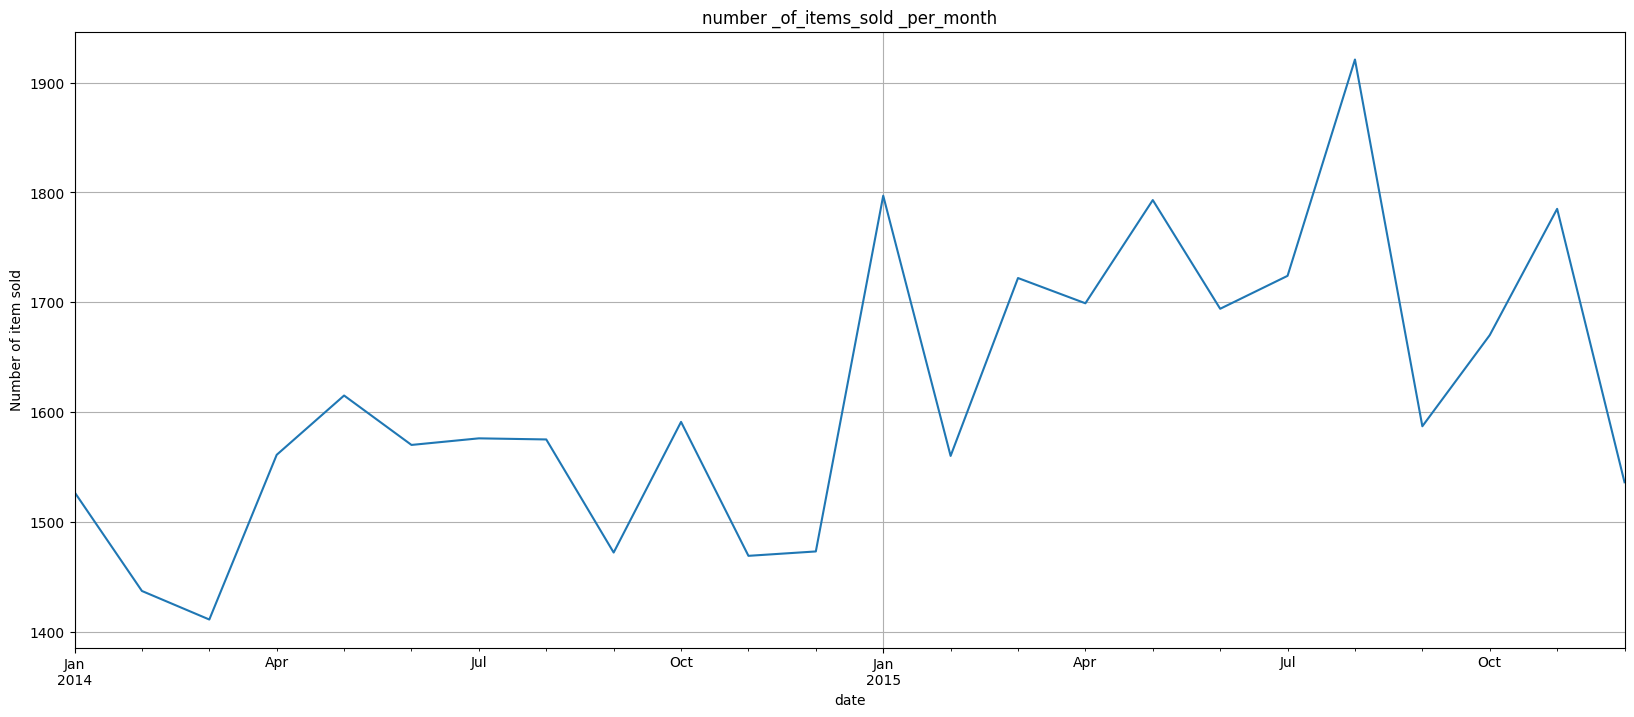

In [13]:
df_date = df.set_index(pd.to_datetime(df['Date']))
df_date.resample("M")["itemDescription"].count().plot(figsize = (20,8), grid = True, title = "number _of_items_sold _per_month").set(xlabel ="date",ylabel = "Number of item sold")

In [14]:
cust_level = df[["Member_number", "itemDescription"]].sort_values(by= "Member_number" , ascending = False) # Changed 'Member_name' to 'Member_number'
cust_level["itemDescription"] = cust_level["itemDescription"].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [15]:
transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(["Member_number"]))]
transactions

[['misc. beverages',
  'sausage',
  'soda',
  'yogurt',
  'salty snack',
  'pastry',
  'canned beer',
  'hygiene articles',
  'whole milk',
  'pickled vegetables',
  'sausage',
  'semi-finished bread',
  'whole milk'],
 ['beef',
  'sausage',
  'frankfurter',
  'soda',
  'whipped/sour cream',
  'frankfurter',
  'rolls/buns',
  'soda',
  'white bread',
  'whole milk',
  'whole milk',
  'curd'],
 ['specialty chocolate',
  'butter',
  'whole milk',
  'butter milk',
  'tropical fruit',
  'sugar',
  'other vegetables',
  'frozen vegetables'],
 ['dental care',
  'rolls/buns',
  'rolls/buns',
  'frozen meals',
  'rolls/buns',
  'sausage',
  'detergent',
  'root vegetables'],
 ['frozen fish',
  'shopping bags',
  'hygiene articles',
  'rolls/buns',
  'whole milk',
  'canned beer',
  'root vegetables',
  'tropical fruit',
  'whole milk',
  'chocolate',
  'other vegetables',
  'red/blush wine',
  'pastry',
  'rolls/buns',
  'packaged fruit/vegetables',
  'dish cleaner',
  'pip fruit',
  'other ve

In [16]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=7a8634e2d5375e200e05697704ac843cc268e74b894bbe978e72e1fe8637c816
  Stored in directory: /root/.cache/pip/wheels/77/3d/a6/d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


In [17]:
from apyori import apriori

In [18]:
rules = apriori(transactions = transactions, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2)

In [19]:
results = list(rules)

In [20]:
results

[RelationRecord(items=frozenset({'UHT-milk', 'kitchen towels'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'beef', 'potato products'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'canned fruit', 'coffee'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'domestic eggs', 'meat spreads'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [24]:
def inspect(results):
    lhs= [tuple(result[2][0][0])[0] for result in results]
    rhs = [tuple(result[2][0][1])[0] for result in results]
    supports = [result[1] for result in results ]
    confidences = [result[2][0][2] for result in results]
    lifts = [result[2][0][3]for result in results]
    return list(zip(lhs,rhs,supports,confidences,lifts))
resulstindataframe = pd.DataFrame(inspect(results),columns = ["Left Hand Side","Right Hand Side","Support","Confidence","Lift"])

In [26]:
resulstindataframe.nlargest(n=10, columns = "Lift")

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
4915,berries,pip fruit,0.002052,0.105263,14.654135
4914,berries,pip fruit,0.002052,0.105263,12.068111
2674,beef,pork,0.002052,0.242424,11.524021
3573,brown bread,soda,0.002052,0.073394,11.443670
4133,long life bakery product,whole milk,0.002052,0.148148,11.105413
3290,bottled water,sausage,0.002052,0.150943,10.322410
2904,brown bread,misc. beverages,0.002309,0.097826,9.533152
5045,bottled water,whole milk,0.002052,0.135593,9.438257
2902,brown bread,domestic eggs,0.002052,0.086957,9.415459
2734,berries,brown bread,0.002309,0.118421,9.232105
